# Linear model
We'll train a linear model for images of 10 digits  
$ y = x * A + b $  
Assuming images 28x28x1 (grayscale), $x$ has dimensionality $28*28 = 784$  
$ x \in R^{784} $  - images  
$ y \in R^{10} $  - scores for each digit  
$ A \in R^{784x10} $  - linear transformation  
$ b \in R^{10} $ -  bias term

We want to find **A, b** that will assign a **high score** to the correct digit

# PyTorch datasets
Default implementations available: https://pytorch.org/docs/stable/data.html  
For images: https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder  
**Dataset** must implement __getitem__(index) (returns indexed element) and __len__() (returns number of elements)  
Some datasets have an interface ready in `torchvision` package and are downloaded automatically

<img src="https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067">

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**MNIST** dataset ready in https://pytorch.org/docs/stable/torchvision/datasets.html#mnist

In [2]:
from torchvision.datasets import MNIST
# Create MNIST dataset
root_dir = '../mnist'
dataset = MNIST(root=root_dir, train=True, download=True)

In [3]:
print(len(dataset))

60000


In [4]:
# Show elements of dataset
image, label = dataset[0]
print(image)
print(label)

<PIL.Image.Image image mode=L size=28x28 at 0x7F12DF59E9B0>
tensor(5)


In [5]:
# Create MNIST dataset that transforms images to Tensors
from torchvision.transforms import ToTensor, Normalize, Compose
transforms = Compose([
                        ToTensor(),
                        Normalize(mean=(0.5,), std=(0.5,))
                    ])
dataset = MNIST(root=root_dir, train=True, transform=transforms)

In [6]:
image, label = dataset[0]
print(image.size())
print(label)

torch.Size([1, 28, 28])
tensor(5)


In [7]:
image, label = dataset[0]
print(image)
print(image.size())
print(label)

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

**DataLoader** objects provide a way to efficiently iterate over datasets https://pytorch.org/docs/stable/data.html

In [8]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4) #num_workers = n - how many threads in background for efficient loading

In [9]:
#We can iterate over the dataset
for xs, ys in dataloader:
    print(xs.size(), ys.size())
    print(ys)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])
tensor([6, 4, 7, 7, 1, 9, 9, 0, 9, 1, 5, 9, 9, 9, 5, 0, 8, 5, 5, 7, 2, 6, 3, 6,
        8, 3, 1, 2, 8, 9, 6, 3])


## PyTorch models
Pytorch models are defined as **Module** objects that need to have a **forward** method implemented that applies transformations (neural network layers) on data. https://pytorch.org/docs/stable/nn.html

In [10]:
import torch.nn as nn
class LinearModel(nn.Module):
    
    def __init__(self, input_dim, n_classes):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(input_dim, n_classes, bias=True) # outputs 10 values - score for each digit
        
    def forward(self, input):
        out = input.view(input.size(0), -1) # convert batch_size x 28 x 28 to batch_size x (28*28)
        out = self.fc(out) # Applies out = input * A + b. A, b are parameters of nn.Linear that we want to learn
        return out

In [11]:
# Create model
input_dim = 28 * 28 # 784
model = LinearModel(input_dim=input_dim, n_classes=10) # dimensionality of x
model = model.to(device)

In [12]:
from utils import train
train(dataloader, model, n_epochs=50, device=device)

Epoch 1, loss: 0.6862353682518005
Epoch 2, loss: 0.375558078289032
Epoch 3, loss: 0.3552388846874237
Epoch 4, loss: 0.49741390347480774
Epoch 5, loss: 0.30345413088798523
Epoch 6, loss: 0.44997918605804443
Epoch 7, loss: 0.643794059753418
Epoch 8, loss: 0.21081581711769104
Epoch 9, loss: 0.7135981321334839
Epoch 10, loss: 0.2454933077096939
Epoch 11, loss: 0.4553917646408081
Epoch 12, loss: 0.2734983563423157
Epoch 13, loss: 0.28187257051467896
Epoch 14, loss: 0.4865741729736328
Epoch 15, loss: 0.2848024368286133
Epoch 16, loss: 0.24679908156394958
Epoch 17, loss: 0.4741402268409729
Epoch 18, loss: 0.586741030216217
Epoch 19, loss: 0.4040805697441101
Epoch 20, loss: 0.3272644877433777
Epoch 21, loss: 0.6087918877601624
Epoch 22, loss: 0.30229705572128296
Epoch 23, loss: 0.4593403935432434
Epoch 24, loss: 0.3462619185447693
Epoch 25, loss: 0.3817089796066284
Epoch 26, loss: 0.31026193499565125
Epoch 27, loss: 0.19566753506660461
Epoch 28, loss: 0.12597836554050446
Epoch 29, loss: 0.3621

In [13]:
torch.save(model.state_dict(), 'model_tmp.ckpt')
torch.save(model.state_dict(), 'model.ckpt')
model.load_state_dict(torch.load('model.ckpt'))

In [14]:
test_dataset = MNIST(root_dir, train=False, download=True, transform=transforms)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [15]:
def predict(dataloader, model):
    model.eval()
    with torch.no_grad():
        predictions = []
        labels = []
        for data, target in dataloader:
            data = data.to(device)
            output = model(data) # calling model calls forward function
            prediction = output.cpu().numpy().argmax(1) # 
            predictions.extend(prediction)
            labels.extend(target.numpy())
    return np.array(predictions), np.array(labels)

In [16]:
import numpy as np
predictions, labels = predict(test_dataloader, model)
accuracy = 100 * np.sum(predictions==labels) / len(labels)
print('Test accuracy: {:.2f}%'.format(accuracy))

Test accuracy: 91.79%


In [17]:
predictions, labels = predict(dataloader, model)
accuracy = 100 * np.sum(predictions==labels) / len(labels)
print('Train accuracy: {:.2f}%'.format(accuracy))

Train accuracy: 91.75%


In [18]:
digit_weights = []
for i in range(10):
    digit_weight = model.fc.weight[i].view(28, 28).detach().cpu().numpy()
    digit_weight = digit_weight - digit_weight.min()
    digit_weight = digit_weight / digit_weight.max() # it's in [0; 1] now
    digit_weights.append(digit_weight)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

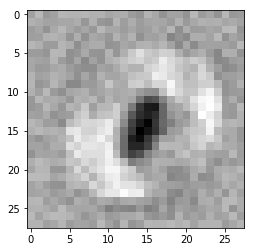

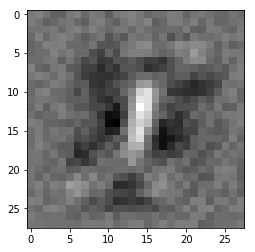

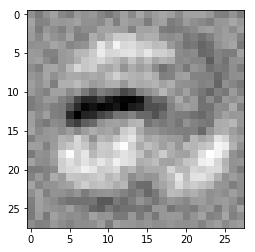

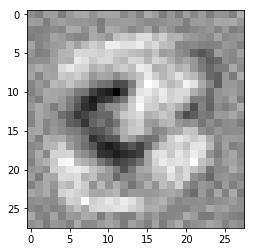

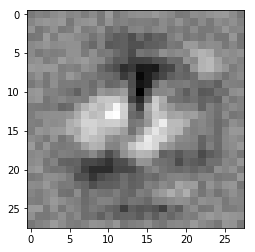

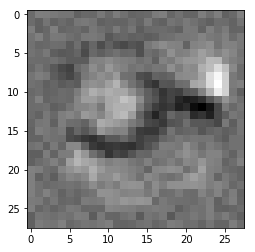

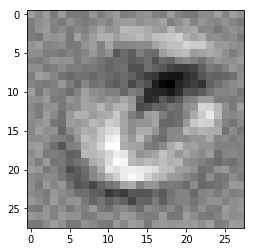

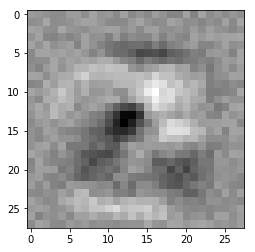

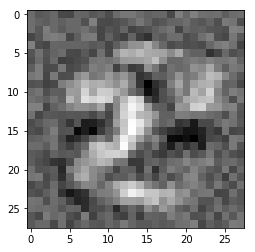

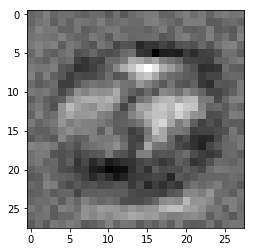

In [20]:
for i in range(10):
    plt.figure()
    plt.imshow(digit_weights[i], cmap='gray')

In [21]:
img = (test_dataset[0][0] * 0.5 + 0.5).numpy()[0]

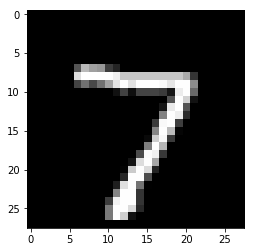

In [22]:
plt.imshow(img, cmap='gray')

In [23]:
output = model(test_dataset[0][0].to(device))
print(output)

tensor([[-0.3785, -7.3903,  0.4402,  3.5943, -2.7272, -0.4499, -6.7815,  9.7225,
         -1.3567,  2.0506]], device='cuda:0', grad_fn=<AddmmBackward>)


In [24]:
print(output.argmax())

tensor(7, device='cuda:0')
